<a href="https://colab.research.google.com/github/park21306/DataProject/blob/main/Pneumonia_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import cv2

normal img :  (1858, 2090, 3)


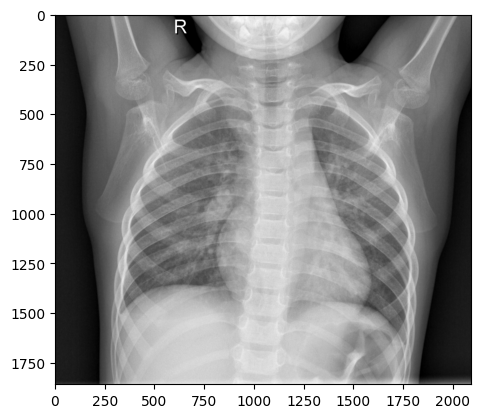

In [3]:
PATH = '/content/gdrive/MyDrive/Dataset/chest_xray/train/NORMAL/IM-0115-0001.jpeg'
img = cv2.imread(PATH)
plt.imshow(img)
print('normal img : ',img.shape)

normal img:  (1858, 2090, 3)


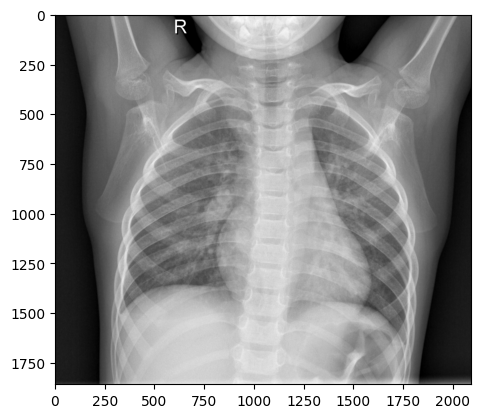

In [4]:
PATH = '/content/gdrive/MyDrive/Dataset/chest_xray/train/NORMAL/IM-0115-0001.jpeg'
img = np.array(cv2.imread(PATH))
plt.imshow(img)
print('normal img: ',img.shape)

pnuemonia img :  (760, 1152, 3)


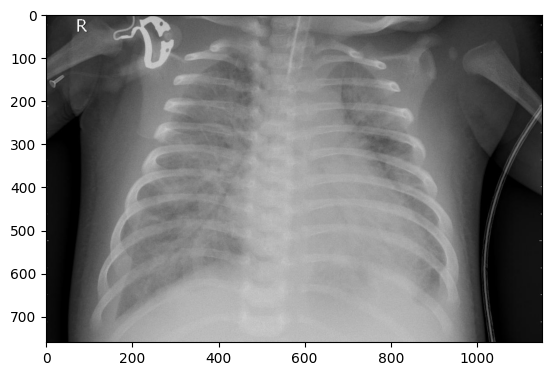

In [5]:
PATH = '/content/gdrive/MyDrive/Dataset/chest_xray/train/PNEUMONIA/person1000_bacteria_2931.jpeg'
img = np.array(cv2.imread(PATH))
plt.imshow(img)
print('pnuemonia img : ',img.shape)

pnuemonia img :  (768, 1072, 3)


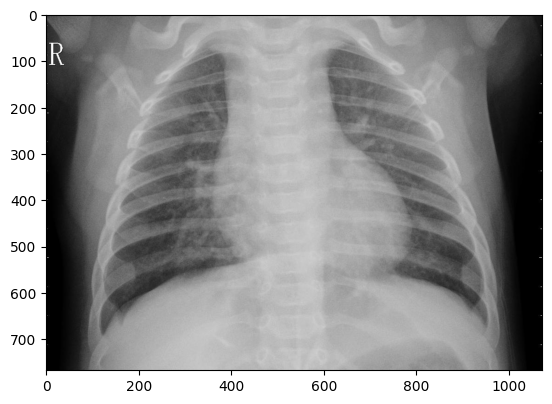

In [6]:
PATH = '/content/gdrive/MyDrive/Dataset/chest_xray/train/PNEUMONIA/person1000_virus_1681.jpeg'
img = np.array(cv2.imread(PATH))
plt.imshow(img)
print('pnuemonia img : ',img.shape)

In [9]:
img_size = (128,128)

In [11]:
data_dir = os.path.join('/content/gdrive/MyDrive/Dataset/chest_xray')

data_train_dir = os.path.join(data_dir,'train')
print('train NORMAL', len(os.listdir(os.path.join(data_train_dir, 'NORMAL'))))
print('train PNEUMONIA', len(os.listdir(os.path.join(data_train_dir, 'PNEUMONIA'))))

data_test_dir = os.path.join(data_dir,'test')
print('test NORMAL', len(os.listdir(os.path.join(data_test_dir, 'NORMAL'))))
print('test PNEUMONIA', len(os.listdir(os.path.join(data_test_dir, 'PNEUMONIA'))))

train NORMAL 1341
train PNEUMONIA 3875
test NORMAL 234
test PNEUMONIA 390


In [12]:
data_generate_train = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255 , rotation_range = 10 , width_shift_range =.2 , height_shift_range =.1 , zoom_range = .1 , horizontal_flip = True)

data_generate_test = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)

In [14]:
generate_train = data_generate_train.flow_from_directory(data_train_dir , target_size=img_size , batch_size=4 , shuffle=True , color_mode='rgb' , class_mode='categorical')

generate_test = data_generate_test.flow_from_directory(data_test_dir , target_size=img_size , batch_size=4 , shuffle=True , color_mode='rgb' , class_mode='categorical')

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


[0. 1.]


/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


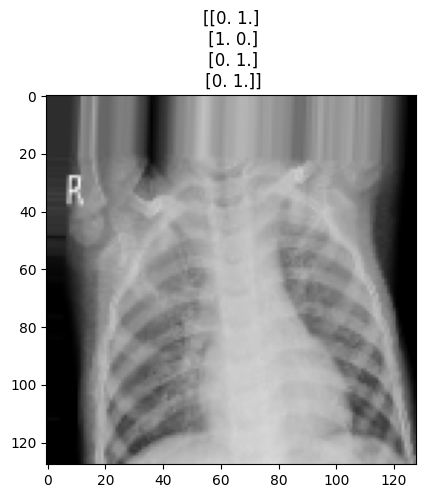

[0. 1.]


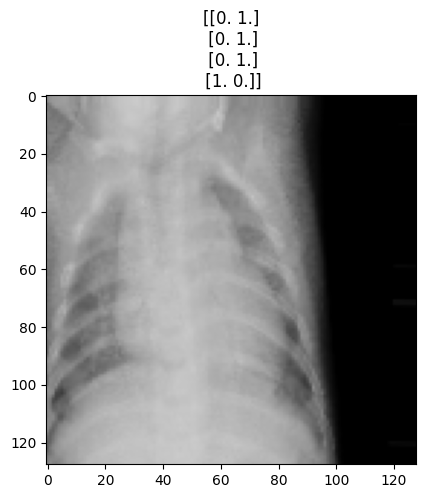

In [15]:
batch = generate_train

for i in range(2) :
  img = batch[i][0]
  clss = batch[i][1]
  print(clss[0])
  plt.imshow(np.array(img[0]))
  plt.title(np.array(clss))
  plt.show()

In [16]:
krnl_sz = (3,3)
pl_sz = (4,4)
conv_act = 'tanh'
dns_act = 'elu'
otpt_act = 'softmax'
dpo = .4

conv1_nns = 64
dns_nns = 64

eps = 20

opt = tf.keras.optimizers.Adam()
ls = tf.keras.losses.CategoricalCrossentropy()

In [19]:
model = tf.keras.models.Sequential([ tf. keras.layers.Conv2D(conv1_nns , krnl_sz , activation='relu' , input_shape=(128,128,3)),
                                    tf.keras.layers.MaxPooling2D(pool_size=pl_sz) ,
                                     tf.keras.layers.Dropout(dpo) ,
                                     tf.keras.layers.Flatten() ,
                                     tf.keras.layers.Dense(dns_nns , activation=dns_act) ,
                                     tf.keras.layers.Dropout(dpo) ,
                                     tf.keras.layers.Dense(dns_nns , activation=dns_act) ,
                                     tf.keras.layers.Dropout(dpo) ,
                                     tf.keras.layers.Dense(dns_nns , activation='relu') ,
                                     tf.keras.layers.Dense(2 , activation=dns_act) ,
                                     ])

model.compile(loss=ls , optimizer=opt , metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 126, 126, 64)      1792      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 31, 31, 64)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 31, 31, 64)        0         
                                                                 
 flatten_1 (Flatten)         (None, 61504)             0         
                                                                 
 dense_1 (Dense)             (None, 64)                3936320   
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                        

In [20]:
h = model.fit(generate_train , validation_data=generate_test , epochs = eps , batch_size=32)

Epoch 1/20
1304/1304 [==============================] - 2234s 2s/step - loss: 1.0072 - acc: 0.6952 - val_loss: 0.6882 - val_acc: 0.6250
Epoch 2/20
1304/1304 [==============================] - 215s 165ms/step - loss: 0.5781 - acc: 0.7421 - val_loss: 0.7164 - val_acc: 0.6250
Epoch 3/20
1304/1304 [==============================] - 235s 180ms/step - loss: 0.5747 - acc: 0.7429 - val_loss: 0.7122 - val_acc: 0.6250
Epoch 4/20
1304/1304 [==============================] - 218s 167ms/step - loss: 0.5710 - acc: 0.7429 - val_loss: 0.6981 - val_acc: 0.6250
Epoch 5/20
1304/1304 [==============================] - 229s 175ms/step - loss: 0.5701 - acc: 0.7425 - val_loss: 0.6677 - val_acc: 0.6250
Epoch 6/20
1304/1304 [==============================] - 225s 172ms/step - loss: 0.6295 - acc: 0.7418 - val_loss: 0.6396 - val_acc: 0.6266
Epoch 7/20
1304/1304 [==============================] - 212s 163ms/step - loss: 0.5879 - acc: 0.7550 - val_loss: 1.5204 - val_acc: 0.6538
Epoch 8/20
1304/1304 [==============

<Axes: >

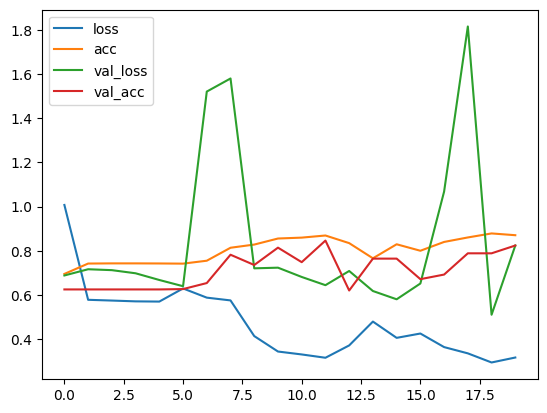

In [22]:
pd.DataFrame(h.history).plot()

In [23]:
train_scores = model.evaluate(generate_train)

1304/1304 [==============================] - 133s 102ms/step - loss: 0.2515 - acc: 0.9066


In [26]:
test_score = model.evaluate(generate_test)

156/156 [==============================] - 10s 64ms/step - loss: 0.8238 - acc: 0.8237
